(sec:tddft-rpa)=
# Spectrum calculation



## Random-phase approximation

The linear response TDHF equations, also known as the random phase approximation (RPA), involves the solution of a non-Hermitian eigenvalue equation which can be written as:

\begin{equation*}
\left(
\begin{array}{cc}
\mathbf{A} & \mathbf{B} \\
\mathbf{B}^* & \mathbf{A}^*
\end{array}
\right) 
\left(
\begin{array}{c}
\mathbf{X} \\
\mathbf{Y}
\end{array}
\right) 
= \omega
\left(
\begin{array}{cc}
\mathbf{1} & \mathbf{0} \\
\mathbf{0}^* & \mathbf{-1}^*
\end{array}
\right) 
\left(
\begin{array}{c}
\mathbf{X} \\
\mathbf{Y}
\end{array}
\right) 
\end{equation*}

From this, excitation energies and transition amplitudes are obtained from the eigenvalues and corresponding eigenvectors, respectively.


## Matrix elements

### Electronic Hessian

The electronic Hessian, $\mathbf{E}^{[2]}$ reads

\begin{eqnarray*}
\mathbf{E}^{[2]} & = &
	\begin{pmatrix}
    \rule[-5pt]{0pt}{20pt}
	\rule{5pt}{0pt}
	\mathbf{A} & \mathbf{B} \rule{5pt}{0pt}
	\\
    \rule[-10pt]{0pt}{25pt}
    \rule{5pt}{0pt}    
	\mathbf{B}^* & \mathbf{A}^* \\
	\end{pmatrix}
\end{eqnarray*}

This structure is the same for TDDFT, which we will focus on. Then, for a general hybrid functional, the blocks are constructed as:

$$
A_{ia,jb}  = \delta_{ij} \delta_{ab} (\epsilon_a - \epsilon_i) + (ia|jb) + c_{\textrm{HF}}(ij|ab) + (1-c_{\textrm{HF}})(ia|f_{\textrm{xc}}|jb)\\
B_{ia,jb}  = (ia|bj) + c_{\textrm{HF}}(ib|aj) + (1-c_{\textrm{HF}})(ia|f_{\textrm{xc}}|bj)
$$

In the limits we retrieve the TDHF blocks ($c_{\textrm{HF}} = 1$) and pure TDDFT ($c_{\textrm{HF}} = 0$). The Tamm-Dancoff approximation (TDA) can be constructed by setting $\mathbf{B}=0$, *i.e.* diagonalizing only $\mathbf{A}$, which for TDHF corresponds to CIS. It can be noted that:

- The matrix is Hermitian and has an internal structure in terms of the matrix blocks $\mathbf{A}$ and $\mathbf{B}$, but not in the full form
- The diagonal elements correspond to differences in energy between the single-excited determinants $|0_i^a\rangle$ and the reference state $|0\rangle$

### Overlap matrix

The overlap matrix, $\mathbf{S}^{[2]}$, in the SCF approximation is trivial and equal to

\begin{eqnarray*}
\label{S2}
\mathbf{S}^{[2]} & = &
  \begin{pmatrix}
    \rule[-10pt]{0pt}{20pt}
     \langle 0 | [\hat{q}_{n}, \hat{q}_{m}^\dagger] | 0 \rangle
     &
     \langle 0 | [\hat{q}_{n}, \hat{q}_{m}] | 0 \rangle \\
    \rule[-5pt]{0pt}{20pt}
     \langle 0 | [\hat{q}_{n}^\dagger, \hat{q}_{m}^\dagger] | 0 \rangle
     &
     \langle 0 | [\hat{q}_{n}^\dagger, \hat{q}_{m}] | 0 \rangle \\
  \end{pmatrix} =
	\begin{pmatrix}
    \rule[-5pt]{0pt}{20pt}
	\rule{5pt}{0pt}
	\mathbf{1} & \mathbf{0} \rule{5pt}{0pt}
	\\
    \rule[-10pt]{0pt}{25pt}
    \rule{5pt}{0pt}    
	\mathbf{0} & -\mathbf{1} \\
	\end{pmatrix} ,
\end{eqnarray*}

where the "1" and the "0" are here understood to be the identity and zero matrices, respectively, of the same rank as sub-blocks $\mathbf{A}$ and $\mathbf{B}$ in the electronic Hessian.

### Property gradient

In the SCF approximation, the property gradient, $\mathbf{V}^{[1]}$, takes the form

\begin{equation*}
  \mathbf{V}^{[1]} =
  \begin{pmatrix}
    \rule[-10pt]{0pt}{20pt}
     \langle 0 | [\hat{a}_{i}^\dagger\hat{a}_{a}, \hat{V}] | 0 \rangle
       \\
    \rule[-5pt]{0pt}{20pt}
     \langle 0 | [\hat{a}_{a}^\dagger\hat{a}_{i}, \hat{V}] | 0 \rangle
  \\
  \end{pmatrix} =
  \begin{pmatrix}
    \rule[-5pt]{0pt}{15pt}
     \langle 0_i^a | \hat{V} | 0 \rangle
       \\
    \rule[-5pt]{0pt}{0pt}
     -\langle 0 | \hat{V} | 0_i^a \rangle
    \\
  \end{pmatrix} =
      \begin{pmatrix}
    \rule[-5pt]{0pt}{15pt}
    \mathbf{g}
       \\
    \rule[-5pt]{0pt}{0pt}
     -\mathbf{g}^*
\\
  \end{pmatrix}
\end{equation*}

```{note}
It is a common practice to adopt the use of spin-adapted electron excitation vectors as a means to reduce the dimension of matrices and vectors.
```

### Numerical example
Let us consider ethylene in a minimal basis set. We perform an SCF optimization of the Hsrtree--Fock reference state with use of the VeloxChem program. The dictonary `scf_tensors` contains information of the SCF calculation and we retrieve the orbital energies.

In [2]:
import veloxchem as vlx
import numpy as np

* Warning * Environment variable OMP_NUM_THREADS not set.
* Warning * Setting OMP_NUM_THREADS to 4.
* Warning * Setting MKL_THREADING_LAYER to "GNU".


In [49]:
mol_str = """
C        0.67759997    0.00000000    0.00000000
C       -0.67759997    0.00000000    0.00000000
H        1.21655197    0.92414474    0.00000000
H        1.21655197   -0.92414474    0.00000000
H       -1.21655197   -0.92414474    0.00000000
H       -1.21655197    0.92414474    0.00000000
"""
molecule = vlx.Molecule.read_str(mol_str, units='angstrom')
basis = vlx.MolecularBasis.read(molecule, "6-31g")

scf_drv = vlx.ScfRestrictedDriver()
scf_drv.compute(molecule, basis)

orbital_energies = scf_drv.scf_tensors['E']
C = scf_drv.scf_tensors['C'] # MO coefficients

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

#### E[2] matrix
For a closed-shell system, the dimension of the $\mathbf{A}$- and $\mathbf{B}$-blocks of the $\mathbf{E}^{[2]}$-matrix equals the number of occupied (spatial) orbitals times the number of virtual orbitals or, in other words

$$\mathrm{dim}\left(\mathbf{E}^{[2]}\right) = 2 \times n_\mathrm{occ} \times n_\mathrm{virt}$$

In [50]:
nocc = molecule.number_of_alpha_electrons()
norb = orbital_energies.shape[0]
nvirt = norb - nocc
n = nocc * nvirt

print('Number of occupied orbitals:', nocc)
print('Number of virtual orbitals:', nvirt)
print('Dimension of A-block in E2:', n)

Number of occupied orbitals: 8
Number of virtual orbitals: 18
Dimension of A-block in E2: 144


We get the $\mathbf{E}^{[2]}$-matrix from the `LinearResponseEigenSolver` class object.

In [51]:
lres_drv = vlx.LinearResponseEigenSolver()
E2 = lres_drv.get_e2(molecule, basis, scf_drv.scf_tensors)

* Info * Processing Fock builds... (batch size: 576)                                                                      
* Info *   batch 1/1                                                                                                      


In [52]:
print('Dimension of E[2] matrix:', E2.shape)

idx = (nocc -1) * nvirt # index position for (pi,pi*) excitation
print(f'Diagonal element for the (pi,pi*)-excitation: {E2[idx,idx] : .6f} a.u.')

Dimension of E[2] matrix: (288, 288)
Diagonal element for the (pi,pi*)-excitation:  0.361149 a.u.


Alternatively, we can in principle determine the elements of the $\mathbf{E}^{[2]}$-matrix from explicit calculations using orbital energies and two-electron integrals in the MO-basis.

In [53]:
# ERI integrals in physicist's notation
moints_drv = vlx.MOIntegralsDriver()
isis = moints_drv.compute_in_memory(molecule, basis, scf_drv.mol_orbs, "chem_OVOV")
iiss = moints_drv.compute_in_memory(molecule, basis, scf_drv.mol_orbs, "chem_OOVV")
# Determine the specific diagonal matrix element of E[2] explicitly 
print(f'Diagonal element (explicit calculation): {orbital_energies[8] - orbital_energies[7]- isis[7,0,7,0] + 2 * iiss[7,7,0,0] : .6f} a.u.')

Diagonal element (explicit calculation):  0.361149 a.u.


#### S[2] matrix
We construct the trivial $\mathbf{S}^{[2]}$-matrix.

In [54]:
S2 = np.identity(2 * n)
S2[n:,n:] *= -1

print('Dimension of S[2] matrix:', S2.shape)

Dimension of S[2] matrix: (288, 288)


#### V[1] gradient
We get the $\mathbf{V}^{\omega,[1]}$-vector from the `LinearResponseSolver` class object. We assume the perturbation operator to equal minus the electric dipole moment operator along the $x$-axis, i.e., the molecular C$-$C axis.

In [55]:
lrs_drv = vlx.LinearResponseSolver()

mu_x = lrs_drv.get_prop_grad('electric dipole', 'x', molecule, basis, scf_drv.scf_tensors)[0]
mu_y = lrs_drv.get_prop_grad('electric dipole', 'y', molecule, basis, scf_drv.scf_tensors)[0]
mu_z = lrs_drv.get_prop_grad('electric dipole', 'z', molecule, basis, scf_drv.scf_tensors)[0]

V1 = -mu_x

print('Dimension of V[1] vector:', V1.shape[0])
print('Elements for (pi,pi*)-excitation:')
print(f'(upper)   g: {V1[idx] : .6f}')
print(f'(lower) -g*: {V1[n + idx] : .6f}')

Dimension of V[1] vector: 288
Elements for (pi,pi*)-excitation:
(upper)   g: -2.005214
(lower) -g*:  2.005214


Alternatively, we can in principle determine the elements of the $\mathbf{V}^{\omega,[1]}$-vector from explicit calculations using one-electron integrals of the perturbation operator in the MO-basis. The property integrals are available in AO-basis from the `ElectricDipoleIntegralsDriver` class object and we transfer them to the MO-basis with use of the MO-coefficients.

In [56]:
dipole_drv = vlx.ElectricDipoleIntegralsDriver()

dipole_matrices = dipole_drv.compute(molecule, basis)
x_ao = dipole_matrices.x_to_numpy()
x_mo = np.matmul(C.T, np.matmul(x_ao, C))

print(f'MO integral < pi | x | pi* >: {x_mo[7,8] : .6f}')

MO integral < pi | x | pi* >:  1.417900


## Electric-dipole polarizability
The polarizability is determined from the linear response function according to

$$
\alpha_{\alpha\beta}(\omega) = -
\langle \! \langle \hat{\mu}_\alpha ; \hat{\mu}_\beta \rangle \! \rangle_\omega
$$

Here, $\hat{\Omega} = \hat{\mu}_\alpha$ and $\hat{V}^\omega = - \hat{\mu}_\beta$ are associated with the observable and perturbation, respectively.

This linear response function is determined from the RPA matrix

$$
\langle\!\langle \hat{\mu}; \hat{V}^\omega \rangle\!\rangle =
-{\boldsymbol{\mu}^{[1]}}^\dagger
\Big(
\mathbf{E}^{[2]} - \omega \mathbf{S}^{[2]}
\Big)^{-1}
\mathbf{V}^{\omega, [1]}
$$

In typical applications, the matrix dimension is large and instead of explicitly constructing the Hessian matrix, we solve the linear response equation with iterative techniques

$$
\mathbf{N}(\omega) =
\Big(
\mathbf{E}^{[2]} - \omega \mathbf{S}^{[2]}
\Big)^{-1}
\mathbf{V}^{\omega,[1]}
$$

such that

$$
\langle\!\langle \hat{\mu}; \hat{V}^\omega \rangle\!\rangle =
-{\boldsymbol{\mu}^{[1]}}^\dagger \mathbf{N}(\omega)
$$

A reduced-space iterative algorithm for solving the linear response funciton is available from the `LinearResponseSolver` class object.

In [57]:
lrs_drv = vlx.LinearResponseSolver()
lrs_out = lrs_drv.compute(molecule, basis, scf_drv.scf_tensors)

                                                                                                                          
                                               Linear Response Solver Setup                                               
                                                                                                                          
                               Number of Frequencies           : 1                                                        
                               Max. Number of Iterations       : 150                                                      
                               Convergence Threshold           : 1.0e-04                                                  
                               ERI Screening Scheme            : Cauchy Schwarz + Density                                 
                               ERI Screening Threshold         : 1.0e-15                                                  
                

The return result `lrs_out` is a dictonary with the values of the response functions provided from the key `response_functions`.

In [58]:
lrs_out.keys()

dict_keys(['response_functions', 'solutions'])

In [59]:
alpha_xx = -lrs_out['response_functions'][('x', 'x', 0)]
alpha_yy = -lrs_out['response_functions'][('y', 'y', 0)] 
alpha_zz = -lrs_out['response_functions'][('z', 'z', 0)]

print(f"alpha_xx(0): {alpha_xx : .6f}")
print(f"alpha_yy(0): {alpha_yy : .6f}")
print(f"alpha_zz(0): {alpha_zz : .6f}")

alpha_xx(0):  32.985929
alpha_yy(0):  19.268122
alpha_zz(0):  7.201365


The solution vectors (or *response vectors*) are available from the key `solutions`, so that we can also determine the the linear response function values from the multiplication of response vectors with property gradients.

In [60]:
Nx = lrs_out['solutions'][('x', 0)]
Ny = lrs_out['solutions'][('y', 0)]
Nz = lrs_out['solutions'][('z', 0)]

print(f"alpha_xx(0): {np.dot(mu_x, Nx) : .6f}")
print(f"alpha_yy(0): {np.dot(mu_y, Ny) : .6f}")
print(f"alpha_zz(0): {np.dot(mu_z, Nz) : .6f}")

alpha_xx(0):  32.985929
alpha_yy(0):  19.268122
alpha_zz(0):  7.201365


In this example, the `LinearResponseSolver` was using its default settings for operators and frequencies, both of which can be changed. We change the value of the optical frequency from the default zero to 0.0656 a.u. with use of the dictionary `rsp_settings`.

In [61]:
lrs_drv = vlx.LinearResponseSolver()
rsp_settings = {'frequencies': [0.0656]}
method_settings = {} # Hartree-Fock is default
lrs_drv.update_settings(rsp_settings, method_settings)

lrs_out = lrs_drv.compute(molecule, basis, scf_drv.scf_tensors)

alpha_xx = -lrs_out['response_functions'][('x', 'x', 0.0656)]
alpha_yy = -lrs_out['response_functions'][('y', 'y', 0.0656)] 
alpha_zz = -lrs_out['response_functions'][('z', 'z', 0.0656)]

print(f"alpha_xx(w=0.0656): {alpha_xx : .6f}")
print(f"alpha_yy(w=0.0656): {alpha_yy : .6f}")
print(f"alpha_zz(w=0.0656): {alpha_zz : .6f}")

                                                                                                                          
                                               Linear Response Solver Setup                                               
                                                                                                                          
                               Number of Frequencies           : 1                                                        
                               Max. Number of Iterations       : 150                                                      
                               Convergence Threshold           : 1.0e-04                                                  
                               ERI Screening Scheme            : Cauchy Schwarz + Density                                 
                               ERI Screening Threshold         : 1.0e-15                                                  
                

Alternatively, in our small example the matrices in the RPA equation ($\mathbf{E}^{[2]}$ and $\mathbf{S}^{[2]}$) have been formed explicitly and we can thus determine values of linear response functions by straightforward matrix inverse and multiplication.

In [62]:
omega = 0.0656
alpha_xx = np.dot(mu_x, np.matmul(np.linalg.inv(E2 - omega * S2), mu_x))
alpha_yy = np.dot(mu_y, np.matmul(np.linalg.inv(E2 - omega * S2), mu_y))
alpha_zz = np.dot(mu_z, np.matmul(np.linalg.inv(E2 - omega * S2), mu_z))

print(f"alpha_xx(w=0.0656): {alpha_xx : .6f}")
print(f"alpha_yy(w=0.0656): {alpha_yy : .6f}")
print(f"alpha_zz(w=0.0656): {alpha_zz : .6f}")

alpha_xx(w=0.0656):  34.018986
alpha_yy(w=0.0656):  19.491345
alpha_zz(w=0.0656):  7.244817


## UV/vis spectrum
From linear response theory, we can also obtain excitation energies and transition moments. An iterative reduced-spece solution of the generalized eigenvalue equation is provided by the `LinearResponseEigenSolver` class object.

In [63]:
lres_drv = vlx.LinearResponseEigenSolver()
rsp_settings = {'nstates': 1} # the (pi,pi*)-transition
lres_drv.update_settings(rsp_settings, method_settings)

lres_out = lres_drv.compute(molecule, basis, scf_drv.scf_tensors)

                                                                                                                          
                                                                                                                          
                                            Linear Response EigenSolver Setup                                             
                                                                                                                          
                               Number of States                : 1                                                        
                               Max. Number of Iterations       : 150                                                      
                               Convergence Threshold           : 1.0e-04                                                  
                               ERI Screening Scheme            : Cauchy Schwarz + Density                                 
                

In [64]:
lres_out.keys()

dict_keys(['eigenvalues', 'eigenvectors', 'electric_transition_dipoles', 'velocity_transition_dipoles', 'magnetic_transition_dipoles', 'oscillator_strengths', 'rotatory_strengths'])

In [65]:
np.set_printoptions(precision = 6, suppress = True)
print('Excitation energy (a.u.):', lres_out['eigenvalues'])
print('Transition moments (a.u.):', lres_out['electric_transition_dipoles'][0])
print('Oscillator strength:', lres_out['oscillator_strengths'])

Excitation energy (a.u.): [0.291534]
Transition moments (a.u.): [-1.531492  0.       -0.      ]
Oscillator strength: [0.455855]


### Generalized eigenvalue equation
We denote by $\mathbf{X}_e$ the eigenvectors of the generalized eigenvalue equation

\begin{equation*}
  \mathbf{E}^{[2]} \mathbf{X}_e = \lambda_e \mathbf{S}^{[2]} \mathbf{X}_e, \quad e = -n,\ldots,-1,1,\ldots,n ,
\end{equation*}
 
where the matrix dimension is $2n$. We find the set of eigenvalues and eigenvectors by diagonalizing the non-Hermitian matrix $\left(\mathbf{S}^{[2]}\right)^{-1} \mathbf{E}^{[2]}$ according to

\begin{equation*}
\label{gen-eig}
  \mathbf{X}^{-1} \left[ \left(\mathbf{S}^{[2]}\right)^{-1} \mathbf{E}^{[2]} \right] \mathbf{X} = 
  \begin{bmatrix}
    \rule[-5pt]{0pt}{15pt}
    \rule{9pt}{0pt}
    \boldsymbol{\lambda} & \rule{3pt}{0pt} \mathbf{0} \rule{3pt}{0pt} \\
    \rule{3pt}{0pt}
    \mathbf{0} & -\boldsymbol{\lambda} \rule{3pt}{0pt} \\
  \end{bmatrix} ,
\end{equation*}

where $\boldsymbol{\lambda}$ is a diagonal matrix of dimension $n$ collecting the eigenvalues with positive index and the columns of $\mathbf{X}$ store the eigenvectors ($\mathbf{X}$ is assumed to be nonsingular). This pairing of eigenvalues has its correspondence in the eigenvectors through

\begin{equation*}
  \mathbf{X}_e =
  \begin{pmatrix}
    \rule[-5pt]{0pt}{15pt}
    \mathbf{Z}_e \\
    \rule[-5pt]{0pt}{0pt}
    \mathbf{Y}_e^* \\
  \end{pmatrix}
\; \mbox{with eigenvalue}\; \lambda_e
; \qquad
  \mathbf{X}_{-e} =
  \begin{pmatrix}
    \rule[-5pt]{0pt}{15pt}
    \mathbf{Y}_{e} \\
    \rule[-5pt]{0pt}{0pt}
    \mathbf{Z}_{e}^* \\
  \end{pmatrix} 
\; \mbox{with eigenvalue}\; -\!\lambda_e .
\end{equation*}

The matrix $\mathbf{X}$ will therefore have the structure

\begin{equation*}
\label{X-struct}
  \mathbf{X} = 
  \begin{bmatrix}
    \rule[-5pt]{0pt}{15pt}
    \rule{3pt}{0pt}
    \mathbf{Z} & \rule{3pt}{0pt} \mathbf{Y} \rule{3pt}{0pt} \\
    \rule{8pt}{0pt}
    \mathbf{Y}^* & \rule{3pt}{0pt} \mathbf{Z}^* \rule{3pt}{0pt} \\
  \end{bmatrix} .
\end{equation*}

With an appropriate scaling of the eigenvectors $\mathbf{X}_e$, the non-unitary matrix $\mathbf{X}$ achieves a simultaneous diagonalization of the two non-commuting matrices $\mathbf{E}^{[2]}$ and $\mathbf{S}^{[2]}$ as

\begin{equation*}
\label{sim-diag}
  \mathbf{X}^\dagger \mathbf{E}^{[2]} \mathbf{X} = 
  \begin{bmatrix}
    \rule[-5pt]{0pt}{15pt}
    \rule{9pt}{0pt}
    \boldsymbol{\lambda} & \rule{3pt}{0pt} \mathbf{0} \rule{3pt}{0pt} \\
    \rule{3pt}{0pt}
    \mathbf{0} & \boldsymbol{\lambda} \rule{3pt}{0pt} \\
  \end{bmatrix} ; \qquad
  \mathbf{X}^\dagger \mathbf{S}^{[2]} \mathbf{X} =
  \begin{bmatrix}
    \rule[-5pt]{0pt}{15pt}
    \rule{8pt}{0pt}
    \mathbf{1} & \rule{5pt}{0pt} \mathbf{0} \rule{3pt}{0pt} \\
    \rule{5pt}{0pt}
    \mathbf{0} & -\mathbf{1} \rule{3pt}{0pt} \\
  \end{bmatrix} .
\end{equation*}

For each pair of eigenvectors, the second equation involving the metric of the generalized eigenvalue equation defines which of the two that should be indexed with a positive index. We also emphasize that $\mathbf{X}^\dagger \neq \mathbf{X}^{-1}$ and for this reason the $\mathbf{X}_e$'s are eigenvectors neither of $\mathbf{E}^{[2]}$ nor of $\mathbf{S}^{[2]}$, just as the $\lambda_e$'s are not the eigenvalues of $\mathbf{E}^{[2]}$.

#### Excitation energies

In [66]:
eigs, X = np.linalg.eig(np.matmul(np.linalg.inv(S2), E2))

# find the index position of the smallest positive eigenvalue
# corresponding to the (pi,pi*)-transition
idx = np.argmin(np.where(eigs>0, eigs, 999))

print(f'Excitation energy (a.u.): {eigs[idx] : .6f}')

Excitation energy (a.u.):  0.291534


#### Transition moments
Since $(\boldsymbol{\Omega \Lambda})^{-1} = \boldsymbol{\Lambda}^{-1} \boldsymbol{\Omega}^{-1}$, we can form the inverse of the RPA matrix as

$$
  \left( \mathbf{E}^{[2]} - \omega \mathbf{S}^{[2]} \right)^{-1} =
  \mathbf{X} \left[ \mathbf{X}^\dagger \left( \mathbf{E}^{[2]} - \omega \mathbf{S}^{[2]} \right) \mathbf{X} \right]^{-1} \mathbf{X}^\dagger
$$

which yields an expression for the linear response function that reads

\begin{eqnarray*}
\label{lrf-resolved}
  \langle \!
  \langle
  \hat{\Omega}; \hat{V}
  \rangle \!
  \rangle & = &
  -
  \left[\boldsymbol{\Omega}^{[1]}\right]^\dagger 
  \sum_{e=1}^n
  \left(
  \frac{
    \mathbf{X}_e
    \mathbf{X}^\dagger_e
    }{
    \lambda_e - \hbar \omega
    }
  +
  \frac{
    \mathbf{X}_e
    \mathbf{X}^\dagger_e 
    }{
    \lambda_e + \hbar \omega
    }
  \right) \mathbf{V}^{\omega,[1]} 
\end{eqnarray*}

This equation suggests that we identify the $\lambda$-eigenvalues as excitation energies of the system and transition moments in the SCF approximation are identified as

\begin{equation*}
\label{tranmom}
    \langle f | \hat{V} | 0 \rangle =
    \mathbf{X}^\dagger_f \mathbf{V}^{\omega,[1]}
\end{equation*}

In [67]:
Xf = X[:,idx]
Xf =  Xf / np.sqrt(np.matmul(Xf.T,np.matmul(S2,Xf)))

tmom = np.dot(Xf, V1)
print(f'Transition moment (a.u.): {tmom : .6f}')

Transition moment (a.u.): -1.531506


### Natural transition orbitals
The characterization of electronic transitions in the TDHF and TDDFT approximations is not always straightforward as due to primarily two reasons:

- Excitation vectors contain elements associated to excitations as well as de-excitations, and the interpretation of the latter part is not obvious
- If not using minimal basis sets, the virtual orbital space is typically large and excitation vectors can have a large number of significant elements

It is therefore receommended to instead use the concept of *natural transition orbitals* (NTOs) for the characterization of electronic transitions.

Collecting occupied and unoccupied (real) MOs as vectors

$$
\bar{\boldsymbol{\phi}}_\mathrm{occ} = (\ldots, \phi_i(\mathbf{r}),  \ldots)^T; \quad
\bar{\boldsymbol{\phi}}_\mathrm{unocc} = (\ldots, \phi_a(\mathbf{r}),  \ldots)^T
$$

and scattering the (real) RPA eigenvector into a rectangular transition matrix $T$ of dimension $n_\mathrm{occ} \times n_\mathrm{unocc}$

$$
T_{f, ia} = Z_{f, ia} - Y_{f, ia}
$$

we can write the transition moment as

\begin{equation*}
    \langle f | \hat{V}^\omega | 0 \rangle =
    \mathbf{X}^T_f \mathbf{V}^{\omega,[1]} = 
    \big(
    \mathbf{Z}_f^T, \mathbf{Y}_f^T
    \big)
    \begin{pmatrix}
    \mathbf{g}\\-\mathbf{g}
    \end{pmatrix}
    =
    \big(
    \mathbf{Z}_f - \mathbf{Y}_f
    \big)^T
    \mathbf{g}
    =
    \int
    \hat{\mu}_\alpha
    \bar{\boldsymbol{\phi}}_\mathrm{occ}^T
    \mathbf{T}
    \bar{\boldsymbol{\phi}}_\mathrm{unocc} \;
    d^3\mathbf{r}
\end{equation*}

By means of a singular value decomposition (SVD), we can factorize the transition matrix

$$
\mathbf{T} = \mathbf{U} \boldsymbol{\Lambda} \mathbf{V}^T
$$

where matrices $\mathbf{U}$ and $\mathbf{V}$ are square unitary and $\boldsymbol{\Lambda}$ is rectangular diagonal

$$
\boldsymbol{\Lambda} =
\begin{bmatrix}
 \lambda_1 & 0 & \cdots & 0 & 0 & \cdots & 0 \\
 0 & \lambda_2 & \cdots & 0 & 0 & \cdots & 0 \\
 \vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
 0 & 0 & \cdots & \lambda_\mathrm{nocc} & 0 & \cdots & 0 \\
\end{bmatrix}
$$

The SVD transformation matrices define the pairs of hole and electron NTOs

$$
\bar{\boldsymbol{\phi}}_\mathrm{h}^T = \bar{\boldsymbol{\phi}}_\mathrm{occ}^T \mathbf{U}; \quad
\bar{\boldsymbol{\phi}}_\mathrm{e} = \mathbf{V}^T \bar{\boldsymbol{\phi}}_\mathrm{unocc}
$$

such that

\begin{equation*}
    \langle f | \hat{V}^\omega | 0 \rangle =
    \int
    \hat{\mu}_\alpha
    \bar{\boldsymbol{\phi}}_\mathrm{h}^T
    \boldsymbol{\Lambda}
    \bar{\boldsymbol{\phi}}_\mathrm{e} \;
    d^3\mathbf{r}
\end{equation*}

The diagonal elements of $\boldsymbol{\Lambda}$ are interpreted as weights in the transition involving electron transfer from the  hole to the electron orbitals.

```{note}
There are $n_\mathrm{occ}$ pairs of hole and electron orbitals. The remainng electron orbitals plays no role in the evaluation of the expression for the transition moment.
```

#### Numerical example
Let us now perform an NTP analysis the $\pi\pi^*$-transition of ethylene. We first carry out an SVD to get the $\lambda$-weights.

In [68]:
Zf = Xf[:n]
Yf = Xf[n:]
T = np.reshape(Zf - Yf, (nocc,nvirt))
U, L, VT = np.linalg.svd(T)

print('Lambda diagonal elements:\n', L)

Lambda diagonal elements:
 [0.907902 0.220204 0.10884  0.097467 0.094168 0.064033 0.000982 0.000764]


We see that this transition is dominated by electron transfer from the first hole orbital, $\phi_\mathrm{h}^1$, to the first electron orbital, $\phi_\mathrm{e}^1$, that are expressed as linear combinations of the occupied and unoccupied orbitals, respectively:

\begin{eqnarray*}
\phi_\mathrm{h}^1 & = &  \sum_{i}^\mathrm{occ} \phi_i U_{i,1} \\
\phi_\mathrm{e}^1 & = &  \sum_{a}^\mathrm{unocc} \phi_a V^T_{1,a}
\end{eqnarray*}

Inspecting the elements of the first column of $U$ and the first row of $V^T$ confirms that this transition is well characterized by a simple HOMO--LUMO excitation.

In [69]:
np.set_printoptions(precision = 2, suppress = True, linewidth = 170)
print('Hole orbital no. 1:', U[:,0])
print('Electron orbital no. 1:', VT[0,:])

Hole orbital no. 1: [-0. -0. -0. -0. -0. -0. -0. -1.]
Electron orbital no. 1: [-1.   -0.   -0.   -0.    0.   -0.    0.   -0.   -0.   -0.04  0.    0.    0.    0.    0.    0.    0.    0.  ]


## Complex polarizability
The complex polarizability is determined from the linear response function according to {cite}`Norman2018`

$$
\alpha_{\alpha\beta}(\omega) = -
\langle \! \langle \hat{\mu}_\alpha ; \hat{\mu}_\beta \rangle  \! \rangle_\omega^\gamma
$$

Here, the linear response equation takes the form

$$
\langle\!\langle \hat{\mu}; \hat{\mu} \rangle\!\rangle =
-{\boldsymbol{\mu}^{[1]}}^\dagger
\Big(
\mathbf{E}^{[2]} - (\omega + i\gamma) \mathbf{S}^{[2]}
\Big)^{-1}
\boldsymbol{\mu}^{[1]}
$$

where the phenomenological damping parameter $\gamma$ is associated with the inverse of the finite lifetime of the excited states in the molecular system. A polarizability calculated in this manner is physically sound for all optical frequencies, be it in the nonresonance or resonence regions of the spectrum. The real and imaginary parts of such complex response functions are related by the Kramers--Kronig relations and typically associated with separate spectroscopies and/or physical phenomena. In the case of the electric-dipole polarizability, the real and imaginary parts are associated with light scattering and absorption, respectively.

We can determine complex response functions by means of the `ComplexResponse` class object.

In [71]:
cpp_drv = vlx.ComplexResponse()

freqs = np.arange(0.26, 0.33, 0.0025)
rsp_settings = {'frequencies': freqs}
cpp_drv.update_settings(rsp_settings, method_settings)
cpp_out = cpp_drv.compute(molecule, basis, scf_drv.scf_tensors)

alpha_xx = []
for freq in freqs:
    alpha_xx.append(-cpp_out['response_functions'][('x', 'x', freq)])

alpha_xx = np.array(alpha_xx)

                                                                                                                          
                                              Complex Response Solver Setup                                               
                                                                                                                          
                               Number of Frequencies           : 29                                                       
                               Max. Number of Iterations       : 150                                                      
                               Convergence Threshold           : 1.0e-04                                                  
                               ERI Screening Scheme            : Cauchy Schwarz + Density                                 
                               ERI Screening Threshold         : 1.0e-15                                                  
                

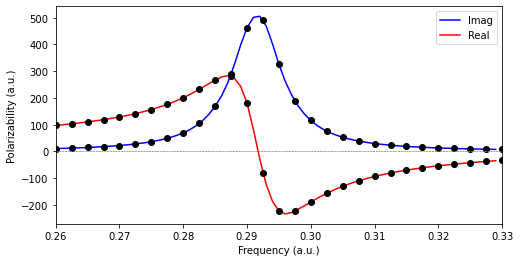

In [72]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

fig = plt.figure(1,figsize=(8,4))

x = np.arange(0.26, 0.33, 0.001)
yR = interp1d(freqs, alpha_xx.real, kind = 'cubic')
yI = interp1d(freqs, alpha_xx.imag, kind = 'cubic')

plt.plot(x, yI(x), 'b-', x, yR(x), 'r-')
plt.plot(freqs, alpha_xx.real, 'ko', freqs, alpha_xx.imag, 'ko')

plt.legend(['Imag', 'Real'])

plt.axhline(y = 0, color = '0.5', linewidth = 0.7, dashes = [3,1,3,1])
plt.setp(plt.gca(),xlim=(0.26,0.33))

plt.ylabel('Polarizability (a.u.)')
plt.xlabel('Frequency (a.u.)')

plt.show()